In [2]:
import os
import sys 
import matplotlib.pyplot as plt
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
sys.path.append('../scripts')

In [27]:
# Load the data
train = pd.read_csv('../data/train.csv')
store = pd.read_csv('../data/store.csv')

# Merge the datasets on 'Store'
merged_data = pd.merge(train, store, on='Store', how='left')

# Check the merged data
print(merged_data.head())


C:\Users\amanu\AppData\Local\Temp\ipykernel_9112\1889605098.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/train.csv')


   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                   

In [33]:
test = pd.read_csv('../data/test.csv')

In [28]:
# Check for missing values
missing_values = merged_data.isnull().sum()
print(missing_values[missing_values > 0])

CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


In [29]:
# Handle missing values in the 'Store' dataset
store['CompetitionDistance'].fillna(0, inplace=True)
store['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
store['CompetitionOpenSinceYear'].fillna(0, inplace=True)
store['Promo2SinceWeek'].fillna(0, inplace=True)
store['Promo2SinceYear'].fillna(0, inplace=True)
store['PromoInterval'].fillna('None', inplace=True)

C:\Users\amanu\AppData\Local\Temp\ipykernel_9112\3541921295.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store['CompetitionDistance'].fillna(0, inplace=True)
C:\Users\amanu\AppData\Local\Temp\ipykernel_9112\3541921295.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [34]:
# Convert 'Date' columns to datetime format
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [35]:
# Fill missing 'Open' values in test data
test['Open'].fillna(0, inplace=True)

C:\Users\amanu\AppData\Local\Temp\ipykernel_9112\2326240774.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Open'].fillna(0, inplace=True)


In [32]:
# Merging test dataset with store dataset
test_merged_df = test.merge(store, how='left', on='Store')

# Display the merged test dataset
test_merged_df


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,0.0,0.0,None
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,0.0,0.0,None
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,0.0,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,0.0,0.0,None
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,0.0,0.0,0,0.0,0.0,None
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,0.0,0.0,0,0.0,0.0,None


In [36]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [37]:
round(merged_data.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


### Outlier Detection

In [40]:
from scipy import stats
# Calculate Z-scores for 'Sales' and 'Customers'
train['Sales_zscore'] = stats.zscore(train['Sales'])
train['Customers_zscore'] = stats.zscore(train['Customers'])

# Remove outliers where Z-score is above 3 or below -3
clean_train = train[~((train['Sales_zscore'] > 3) | (train['Sales_zscore'] < -3) |
                                (train['Customers_zscore'] > 3) | (train['Customers_zscore'] < -3))]

# Drop Z-score columns
clean_train_data = clean_train.drop(columns=['Sales_zscore', 'Customers_zscore'])

# Check for remaining missing values
print(clean_train.isnull().sum())


Store               0
DayOfWeek           0
Date                0
Sales               0
Customers           0
Open                0
Promo               0
StateHoliday        0
SchoolHoliday       0
Sales_zscore        0
Customers_zscore    0
dtype: int64


### Exploratory Data Analysis

### Promo Distribution in Train and Test Sets

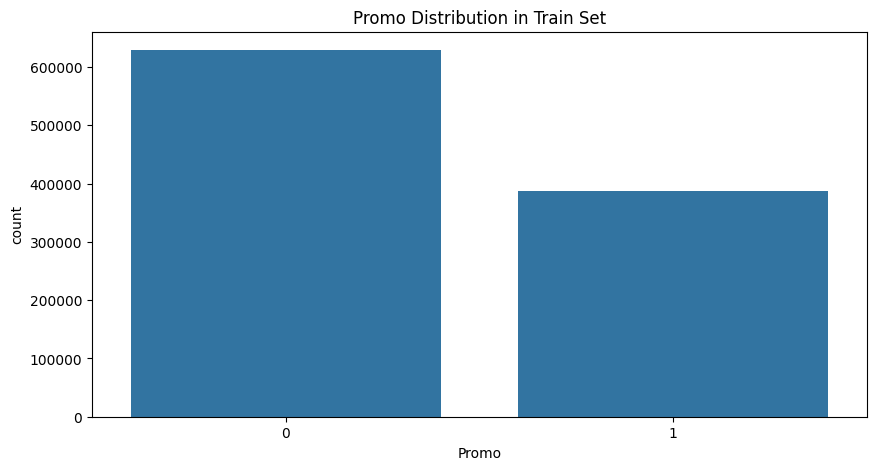

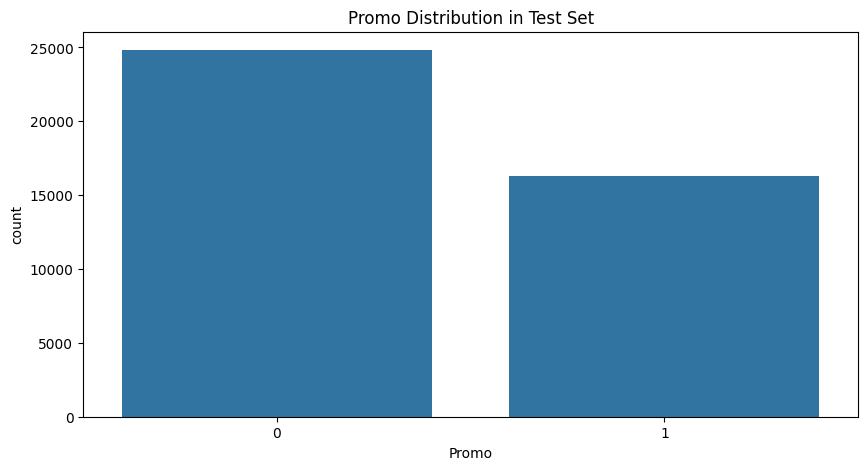

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Promo distribution comparison between train and test sets
plt.figure(figsize=(10, 5))
sns.countplot(data=train, x='Promo')
plt.title('Promo Distribution in Train Set')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=test, x='Promo')
plt.title('Promo Distribution in Test Set')
plt.show()


### Sales Behavior Before, During, and After Holidays

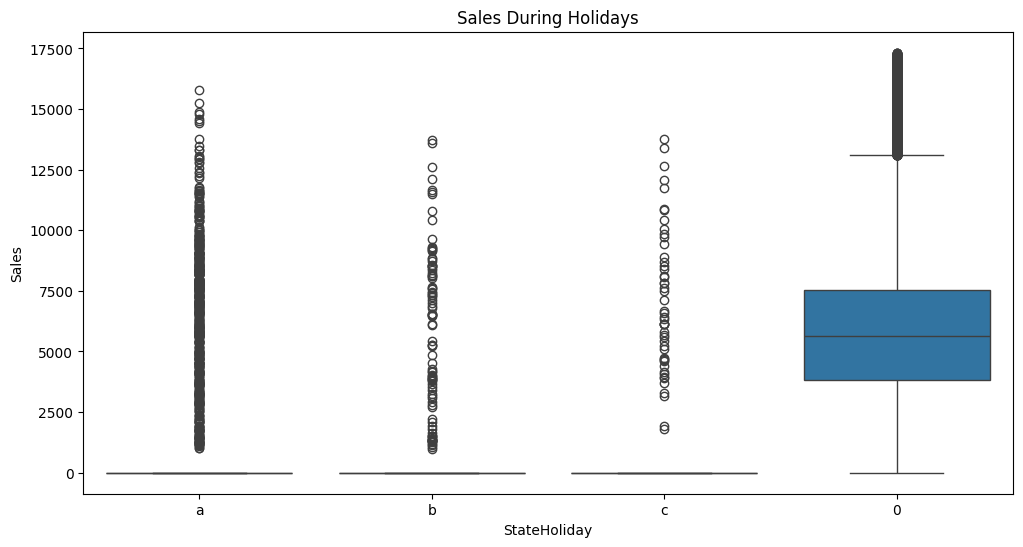

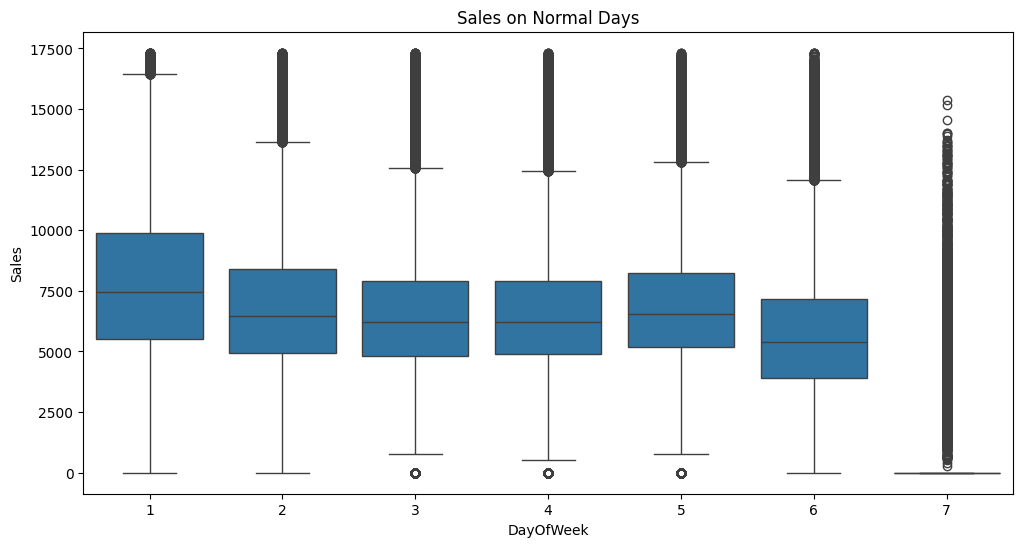

In [42]:
# Check sales before, during, and after holidays
holiday_sales = clean_train[clean_train['StateHoliday'] != '0']
normal_sales = clean_train[clean_train['StateHoliday'] == '0']

plt.figure(figsize=(12, 6))
sns.boxplot(data=holiday_sales, x='StateHoliday', y='Sales')
plt.title('Sales During Holidays')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=normal_sales, x='DayOfWeek', y='Sales')
plt.title('Sales on Normal Days')
plt.show()


C:\Users\amanu\AppData\Local\Temp\ipykernel_9112\3417104962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_train['Month'] = clean_train['Date'].dt.month


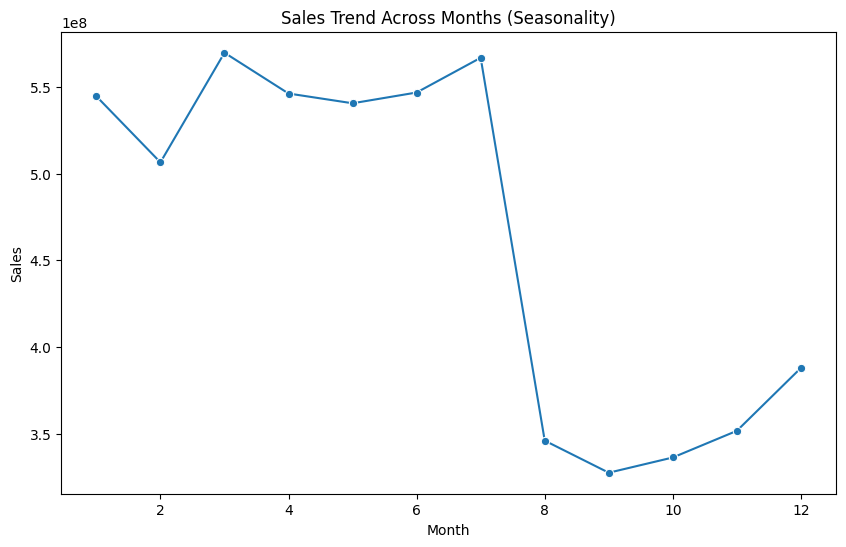

In [52]:
# Extract month from the date column
clean_train['Month'] = clean_train['Date'].dt.month

# Group data by month and sum up sales
monthly_sales = clean_train.groupby('Month')['Sales'].sum().reset_index()

# Line plot for seasonal trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o')
plt.title('Sales Trend Across Months (Seasonality)')
plt.show()


### Correlation Between Sales and Number of Customers

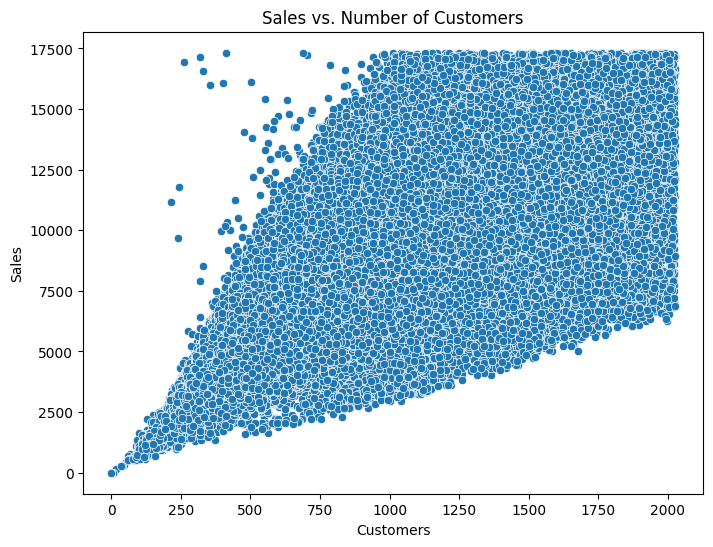

Correlation between Sales and Customers: 0.9088533812155517


In [43]:
# Correlation between sales and customers
plt.figure(figsize=(8, 6))
sns.scatterplot(data=clean_train, x='Customers', y='Sales')
plt.title('Sales vs. Number of Customers')
plt.show()

# Calculate the correlation
correlation = clean_train['Sales'].corr(clean_train['Customers'])
print(f"Correlation between Sales and Customers: {correlation}")


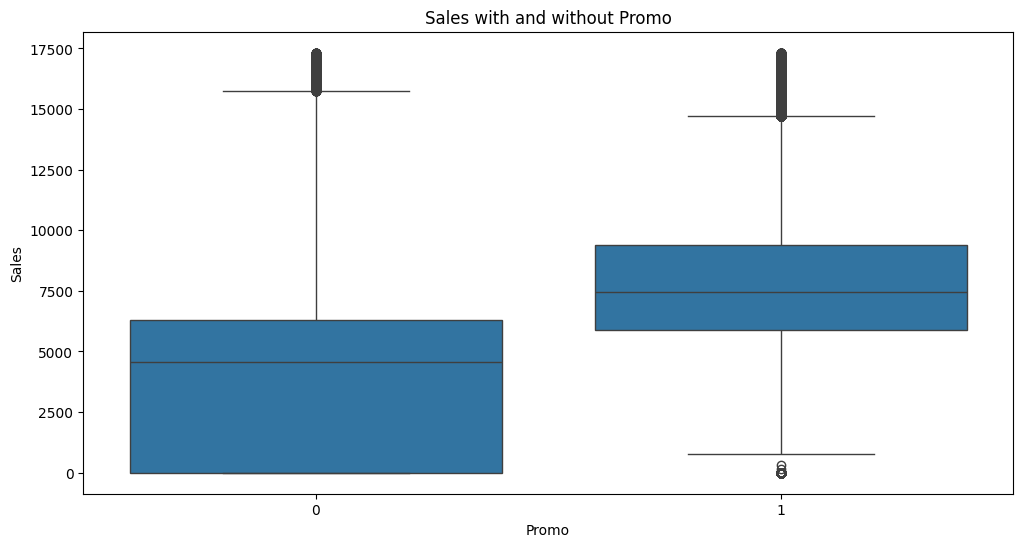

Average customers with promo: Promo
1    779.017624
Name: Customers, dtype: float64
Average customers without promo: Promo
0    492.158246
Name: Customers, dtype: float64


In [45]:
# Sales with and without promos
promo_sales = clean_train[clean_train['Promo'] == 1]
no_promo_sales = clean_train[clean_train['Promo'] == 0]

# Plot sales distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_train, x='Promo', y='Sales')
plt.title('Sales with and without Promo')
plt.show()

# Check if promotions attract more customers
promo_customer_sales = promo_sales.groupby('Promo')['Customers'].mean()
no_promo_customer_sales = no_promo_sales.groupby('Promo')['Customers'].mean()

print(f"Average customers with promo: {promo_customer_sales}")
print(f"Average customers without promo: {no_promo_customer_sales}")


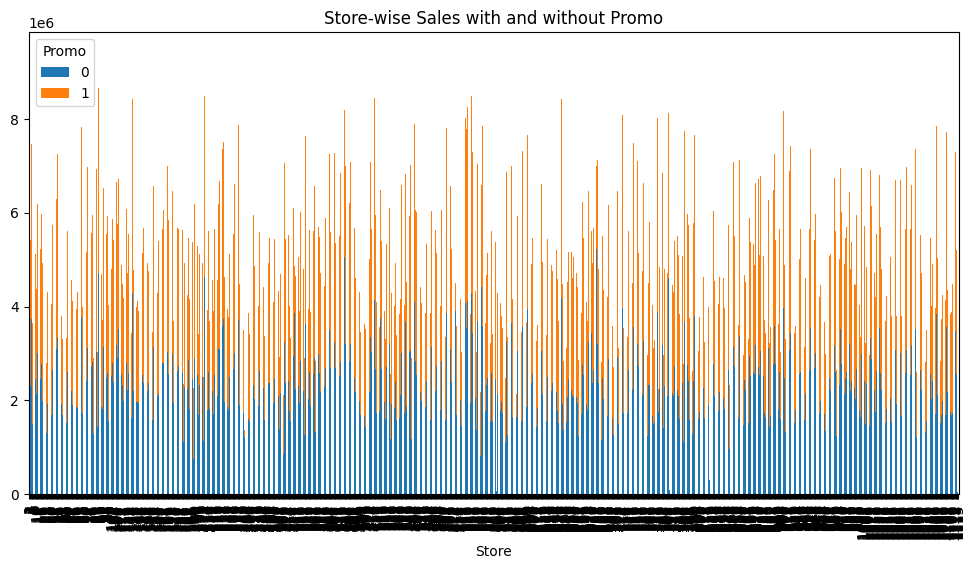

In [46]:
# Check sales per store with and without promos
store_promo_sales = clean_train.groupby(['Store', 'Promo'])['Sales'].sum().unstack()

# Visualize the difference
store_promo_sales.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Store-wise Sales with and without Promo')
plt.show()


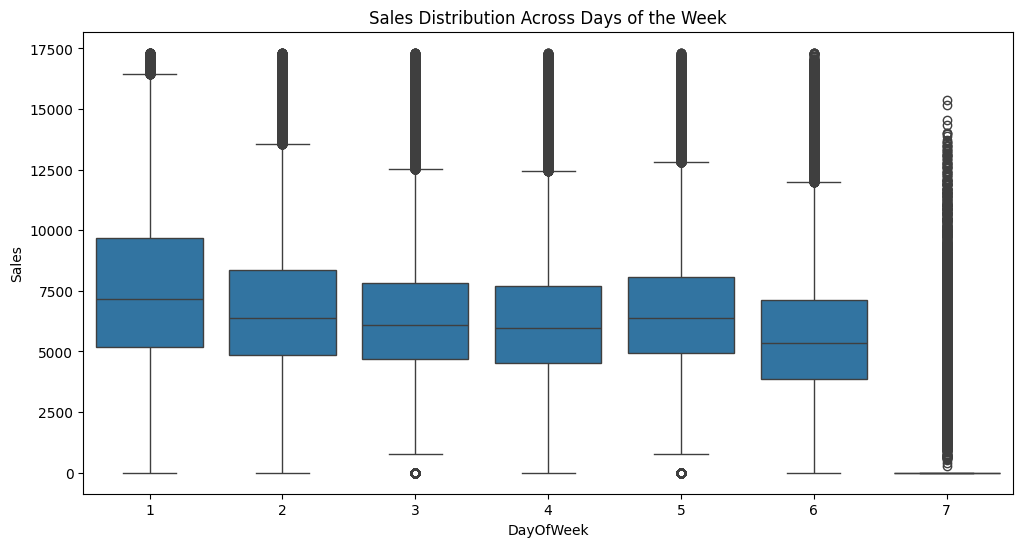

In [47]:
# Group sales by stores open on weekdays vs weekends
weekday_sales = clean_train[clean_train['DayOfWeek'] <= 5]
weekend_sales = clean_train[clean_train['DayOfWeek'] > 5]

# Visualize the sales for stores open on weekdays vs weekends
plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_train, x='DayOfWeek', y='Sales')
plt.title('Sales Distribution Across Days of the Week')
plt.show()


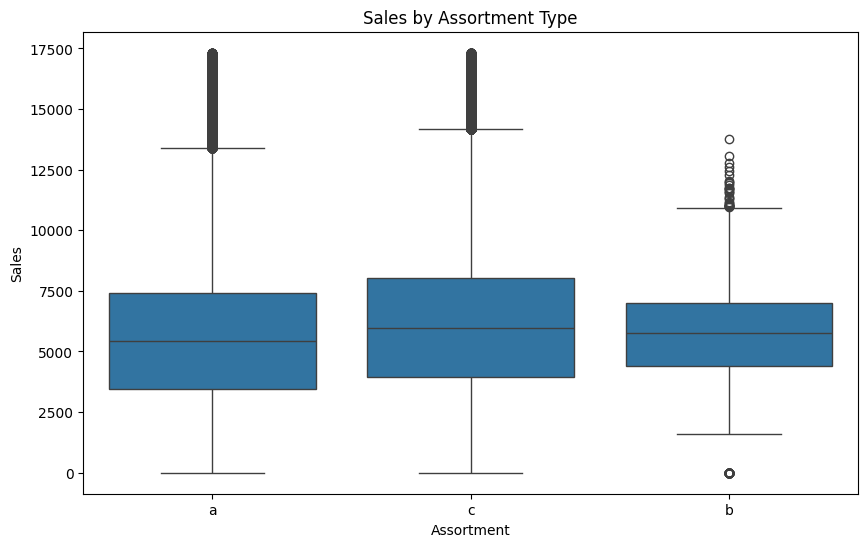

In [48]:
# Merge store data with train data for assortment analysis
merged_data = pd.merge(clean_train, store, on='Store')

# Visualize sales by assortment type
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Assortment', y='Sales')
plt.title('Sales by Assortment Type')
plt.show()


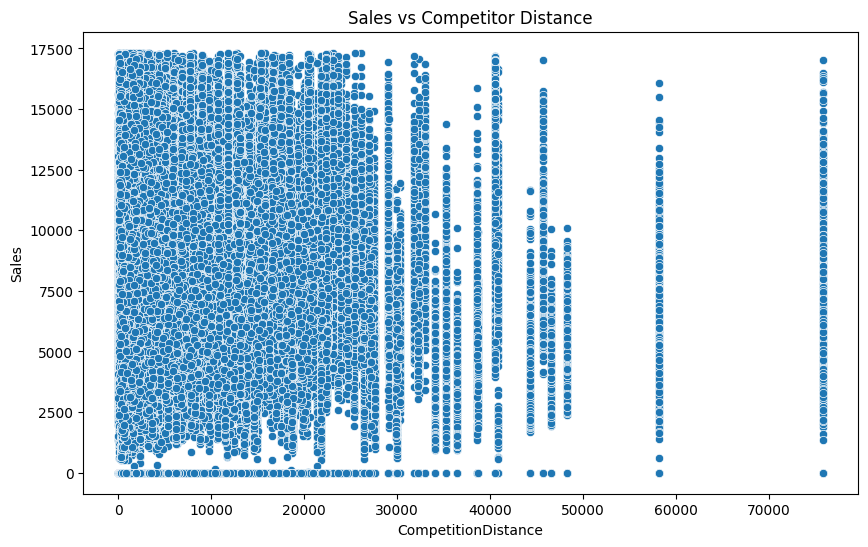

Correlation between Sales and Competitor Distance: 0.0061845323361459995


In [49]:
# Visualize sales vs competitor distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='CompetitionDistance', y='Sales')
plt.title('Sales vs Competitor Distance')
plt.show()

# Correlation between sales and competition distance
correlation = merged_data['Sales'].corr(merged_data['CompetitionDistance'])
print(f"Correlation between Sales and Competitor Distance: {correlation}")


In [50]:
# Filter stores where competitor distance was initially missing and now filled
new_competitor_data = store[store['CompetitionDistance'].isna()]
